ANOVA(Analysis of Variance) to compare more than three groups
<br> Conditions : independence, normality, equivariance.
<br> F-value means how many times the variance btw groups is larger than that of
<ol>
    Hypothesis of one-way ANOVA:
    <li>H0 : the mean of all the groups is equal</li>
    <li>H1 : there is at least one group whose mean differs from otehrs</li>
</ol>

In [1]:
import pandas as pd
plant = pd.read_csv('data/PlantGrowth.csv')
plant.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [2]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [3]:
plant['group'].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

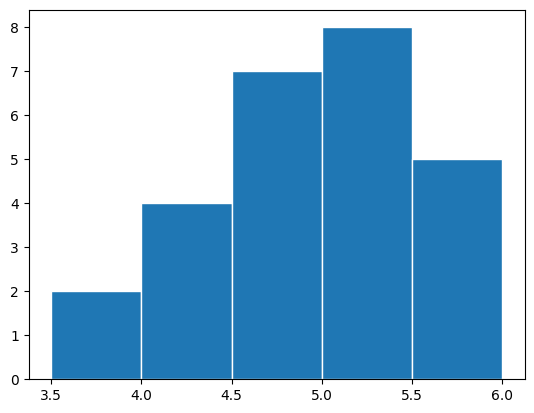

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(plant['weight'], edgecolor='w', bins=np.arange(3.5, 6.5, 0.5))
plt.show()

In [8]:
plant.groupby('group')['weight'].mean()

group
ctrl    5.032
trt1    4.661
trt2    5.526
Name: weight, dtype: float64

In [10]:
plant['group'].value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

In [19]:
# check basic hypothesises : normality and equivariance
plant_ctrl = plant[plant['group']=='ctrl']
plant_trt1 = plant[plant['group']=='trt1']
plant_trt2 = plant[plant['group']=='trt2']

plant_ctrl

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [22]:
from scipy import stats
print(stats.shapiro(plant_ctrl['weight']))
print(stats.shapiro(plant_trt1['weight']))
print(stats.shapiro(plant_trt2['weight']))

ShapiroResult(statistic=np.float64(0.9566814905276368), pvalue=np.float64(0.7474734451902585))
ShapiroResult(statistic=np.float64(0.9304106932921845), pvalue=np.float64(0.45194395810927823))
ShapiroResult(statistic=np.float64(0.9410051970546394), pvalue=np.float64(0.5642518926711526))


In [23]:
print(stats.levene(plant_ctrl['weight'], plant_trt1['weight']))
print(stats.levene(plant_ctrl['weight'], plant_trt2['weight']))
print(stats.levene(plant_trt1['weight'], plant_trt2['weight']))

LeveneResult(statistic=np.float64(0.620263222815704), pvalue=np.float64(0.4411975737805168))
LeveneResult(statistic=np.float64(0.5281279871207939), pvalue=np.float64(0.4767404455256441))
LeveneResult(statistic=np.float64(2.104177792800407), pvalue=np.float64(0.16410083156790234))


In [13]:
# Anova table for one or more fitted linear models.
from statsmodels.stats.anova import anova_lm
# Ordinary Least Squares (OLS) method for linear regression
from statsmodels.formula.api import ols

In [15]:
model = ols('weight ~ C(group)', plant).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


Provided that PR(&gt;F) is less than 0.0.5, reject the null hypothesis and accept the alternative one: H1 : there is at least one group whose mean differs from otehrs.
<br> one can get detailed information about differences btw them by using "post hoc test"

In [18]:
# Tukey HSD (Tukey's honestly significant difference)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(plant['weight'], plant['group'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
ctrl,trt1,-0.371,0.3909,-1.0622,0.3202,False
ctrl,trt2,0.494,0.198,-0.1972,1.1852,False
trt1,trt2,0.865,0.012,0.1738,1.5562,True


the difference btw treatment 1 and 2 is statistically significant given that the p-adj (0.012) is lower than 0.0.5.